In [13]:
from sdv.datasets.demo import download_demo
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.evaluation.single_table import evaluate_quality, run_diagnostic
from sdv.evaluation.single_table import get_column_plot
from sdv.metadata import SingleTableMetadata

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [67]:
real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)

numerical_dist_list = [
    "norm",
    "beta",
    "truncnorm",
    "gamma",
    "uniform",
    "gaussian_kde",
]

synthesizer = GaussianCopulaSynthesizer(metadata, numerical_distributions=None)
synthesizer.fit(data=real_data)

synthetic_data = synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    make_meta
)

c:\Users\kdgh685\OneDrive - AZCollaboration\Escritorio\Jose\TabularDataGAN\venv\lib\site-packages\sdmetrics\reports\utils.py:660: UserWarning: Unexpected values ("dsullivan@example.net", "steven59@example.org", "brandon15@example.net", "humphreyjennifer@example.net", "joshuabrown@example.net" + more) in column "guest_email"
  warnings.warn(warning_format.format(values=values, column=column))
c:\Users\kdgh685\OneDrive - AZCollaboration\Escritorio\Jose\TabularDataGAN\venv\lib\site-packages\sdmetrics\reports\utils.py:660: UserWarning: Unexpected values ("26 Mar 2020", "30 Mar 2020", "13 Jan 2020", "24 Oct 2020", "21 Feb 2020" + more) in column "checkin_date"
  warnings.warn(warning_format.format(values=values, column=column))
c:\Users\kdgh685\OneDrive - AZCollaboration\Escritorio\Jose\TabularDataGAN\venv\lib\site-packages\sdmetrics\reports\utils.py:660: UserWarning: Unexpected values ("21 Aug 2020", "20 May 2020", "nan", "10 Aug 2020", "15 Feb 2020" + more) in column "checkout_date"
  war


Overall Quality Score: 46.14%

Properties:
Column Shapes: 59.35%
Column Pair Trends: 32.93%


In [63]:
quality_report.get_score()

0.4613875312960214

In [42]:
quality_report.get_details()

TypeError: get_details() missing 1 required positional argument: 'property_name'

In [38]:
quality_report._metric_results

{'KSComplement': {'guest_email': {'score': nan},
  'room_type': {'score': nan},
  'billing_address': {'score': nan},
  'has_rewards': {'score': nan},
  'credit_card_number': {'score': nan},
  'amenities_fee': {'score': 0.7041625041625041},
  'checkin_date': {'score': 0.968},
  'checkout_date': {'score': 0.9770833333333333},
  'room_rate': {'score': 0.732}},
 'TVComplement': {'guest_email': {'score': nan},
  'checkout_date': {'score': nan},
  'billing_address': {'score': nan},
  'checkin_date': {'score': nan},
  'credit_card_number': {'score': nan},
  'amenities_fee': {'score': nan},
  'room_rate': {'score': nan},
  'has_rewards': {'score': 0.952},
  'room_type': {'score': 0.9139999999999999}},
 'CorrelationSimilarity': {('amenities_fee',
   'checkin_date'): {'score': 0.9774023900925929, 'real': 0.031410278552705395, 'synthetic': 0.07660549836751955},
  ('amenities_fee', 'checkout_date'): {'score': 0.9631401529993812,
   'real': 0.023048744267760535,
   'synthetic': 0.09676843826899831}

In [37]:
dir(quality_report)[10:]

['__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_metric_results',
 '_overall_quality_score',
 '_print_results',
 '_property_breakdown',
 '_property_errors',
 'generate',
 'get_details',
 'get_properties',
 'get_raw_result',
 'get_score',
 'get_visualization',
 'load',
 'save']

In [61]:
quality_report = run_diagnostic(
    real_data,
    synthetic_data,
    make_meta
)

c:\Users\kdgh685\OneDrive - AZCollaboration\Escritorio\Jose\TabularDataGAN\venv\lib\site-packages\sdmetrics\reports\utils.py:660: UserWarning: Unexpected values ("dsullivan@example.net", "steven59@example.org", "brandon15@example.net", "humphreyjennifer@example.net", "joshuabrown@example.net" + more) in column "guest_email"
  warnings.warn(warning_format.format(values=values, column=column))
c:\Users\kdgh685\OneDrive - AZCollaboration\Escritorio\Jose\TabularDataGAN\venv\lib\site-packages\sdmetrics\reports\utils.py:660: UserWarning: Unexpected values ("26 Mar 2020", "30 Mar 2020", "13 Jan 2020", "24 Oct 2020", "21 Feb 2020" + more) in column "checkin_date"
  warnings.warn(warning_format.format(values=values, column=column))
c:\Users\kdgh685\OneDrive - AZCollaboration\Escritorio\Jose\TabularDataGAN\venv\lib\site-packages\sdmetrics\reports\utils.py:660: UserWarning: Unexpected values ("21 Aug 2020", "20 May 2020", "nan", "10 Aug 2020", "15 Feb 2020" + more) in column "checkout_date"
  war


DiagnosticResults:

SUCCESS:
✓ The synthetic data covers over 90% of the numerical ranges present in the real data
✓ Over 90% of the synthetic rows are not copies of the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data

! The synthetic data is missing more than 10% of the categories present in the real data


In [26]:
quality_report.METRICS['Coverage'][0].value

AttributeError: type object 'RangeCoverage' has no attribute 'value'

In [21]:
dir(quality_report)

['METRICS',
 '_METRIC_ARGS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_metric_args',
 '_metric_averages',
 '_metric_results',
 '_print_results',
 '_property_scores',
 '_results',
 'generate',
 'get_details',
 'get_properties',
 'get_results',
 'get_visualization',
 'load',
 'save']

In [4]:
from sdmetrics.single_column import BoundaryAdherence

In [68]:
synthetic_data

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,True,BASIC,2.10,26 Mar 2020,12 Apr 2020,122.83,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,steven59@example.org,False,DELUXE,NaN,03 Jul 2020,15 Sep 2020,175.30,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,brandon15@example.net,False,DELUXE,22.38,30 Mar 2020,17 Mar 2020,151.45,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,humphreyjennifer@example.net,False,BASIC,8.44,05 May 2020,22 May 2020,169.82,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,joshuabrown@example.net,False,SUITE,8.21,13 Jan 2020,10 Jan 2020,189.85,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978
...,...,...,...,...,...,...,...,...,...
495,donnaodom@example.net,False,DELUXE,8.41,16 Jan 2020,16 Jan 2020,328.36,"327 Jones Loaf\nJohnchester, GA 22128",180069262819334
496,tammycarey@example.net,True,DELUXE,5.33,19 Apr 2020,09 Jun 2020,248.61,"60371 Ruiz Highway\nSmithberg, DE 13319",4716059563401606
497,gwebb@example.org,True,BASIC,0.15,19 Mar 2020,07 Apr 2020,151.73,"48515 Martinez Bridge Suite 406\nPort Regina, ...",3564840847844629
498,carlnovak@example.com,False,BASIC,37.09,28 Aug 2020,19 Jun 2020,376.40,"7453 Harvey Dale\nKevinborough, NY 12500",4707209056757331019


In [66]:
"misty33@smith.biz" in real_data["guest_email"]

False

In [6]:
real_data

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983
...,...,...,...,...,...,...,...,...,...
495,laurabennett@jones-duncan.net,False,BASIC,8.71,04 Jan 2021,06 Jan 2021,103.25,"5678 Office Road\nSan Francisco, CA 94103",3505516387300030
496,johnny71@cook.info,False,BASIC,16.31,24 Aug 2020,26 Aug 2020,115.81,"953 White Island\nChristopherside, TN 91366",2224524502892552
497,ygarcia@ballard-lopez.net,False,BASIC,30.59,11 Nov 2020,13 Nov 2020,141.61,"5678 Office Road\nSan Francisco, CA 94103",180096250673548
498,thomasdale@hall.com,False,BASIC,1.93,16 Jul 2020,18 Jul 2020,136.92,"5678 Office Road\nSan Francisco, CA 94103",4488223821722


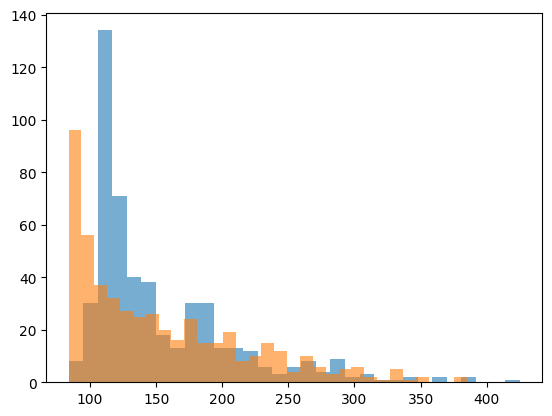

In [11]:
BoundaryAdherence.compute(
    real_data=real_data['room_rate'],
    synthetic_data=synthetic_data['room_rate']
)

plt.hist(real_data['room_rate'], bins=31, alpha=0.6)
plt.hist(synthetic_data['room_rate'], bins=31, alpha=0.6)

plt.show()

In [44]:
from sdv.metadata import Metadata

ImportError: cannot import name 'Metadata' from 'sdv.metadata' (c:\Users\kdgh685\OneDrive - AZCollaboration\Escritorio\Jose\TabularDataGAN\venv\lib\site-packages\sdv\metadata\__init__.py)

In [45]:
import sdv.metadata as Metadata

In [49]:
dir(Metadata.SingleTableMetadata)[-20:]

['_validate_numerical',
 '_validate_pii',
 '_validate_sdtype',
 '_validate_sequence_index',
 '_validate_sequence_index_not_in_sequence_key',
 '_validate_unexpected_kwargs',
 'add_alternate_keys',
 'add_column',
 'detect_from_csv',
 'detect_from_dataframe',
 'load_from_dict',
 'load_from_json',
 'save_to_json',
 'set_primary_key',
 'set_sequence_index',
 'set_sequence_key',
 'to_dict',
 'update_column',
 'upgrade_metadata',
 'validate']

In [56]:
make_meta = Metadata.SingleTableMetadata()

In [57]:
make_meta.detect_from_dataframe(data=real_data)

In [58]:
make_meta

{
    "columns": {
        "guest_email": {
            "sdtype": "categorical"
        },
        "has_rewards": {
            "sdtype": "boolean"
        },
        "room_type": {
            "sdtype": "categorical"
        },
        "amenities_fee": {
            "sdtype": "numerical"
        },
        "checkin_date": {
            "sdtype": "categorical"
        },
        "checkout_date": {
            "sdtype": "categorical"
        },
        "room_rate": {
            "sdtype": "numerical"
        },
        "billing_address": {
            "sdtype": "categorical"
        },
        "credit_card_number": {
            "sdtype": "numerical"
        }
    },
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1"
}